### Student Information
Name: 李哲言

Student ID: r13944002

GitHub ID: f776655321

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

## First

In [197]:
### Begin Assignment Here


### **>>> Exercise 1 (Watch Video):**  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [ ]:
# Answer here
for text in twenty_train.data[:3]:
    print(text)

### **>>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information.

In [ ]:
#Answer here
# Query rows where category is 2 and 'nasa' is in the text
print(X[(X['category'] == 2) & (X['text'].str.contains('nasa', case=False))]['text'][:5])

### **>>> Exercise 3 (Watch Video):**  
Try to fetch records belonging to the ```sci.med``` category, and query every 10th record. Only show the first 5 records.

In [ ]:
# Answer here
print(X[X["category_name"] == 'sci.med'].iloc[::10][:5])

### >>> **Exercise 4 (Watch Video):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [ ]:
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [ ]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

In [ ]:
NA_df['missing_example'].isnull()

In [ ]:
# Answer here
"At first glance, we might expect all rows in the dataframe to return True. However, that's not the case. This issue arises due to being misled by the data types. Specifically, the values in indices 2, 3, and 5 are strings, so pandas does not recognize them as null values."

### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [ ]:
# Answer here
# original = 0
## change from X would not affect X_sample by the observation of following code
# X.loc[1872,'category'] = 0
# print(X.iloc[1872])
# X_sample[0:4]
## change from X_sample would not affect X by the observation of following code
# X_sample.loc[1872,'category'] = 1
# print(X_sample.iloc[0])
# X.iloc[1872]

## Answer
'''
I notice that when I want to change the value for X_sample, I need to use its original index in X to change it when I calling loc function 
and the change from X or X_sample would not affect each other.
'''

### >>> **Exercise 7 (Watch Video):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

In [ ]:
# Answer here
upper_bound = X_sample.category_name.value_counts().max()
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound + 50], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

In [ ]:
# Answer here
import pandas as pd
import matplotlib.pyplot as plt

# Example data
X_counts = X.category_name.value_counts()

X_sample_counts = X_sample.category_name.value_counts()

upper_bound = X_counts.max() + 50
# Combine series into a DataFrame
df = pd.DataFrame({
    'X': X_counts,
    'X sample': X_sample_counts
})

# Plotting
df.plot(kind='bar', title='Category Distribution', ylim=[0, upper_bound], rot=0, fontsize=12, figsize=(10, 4))

### **>>> Exercise 9 (Watch Video):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [ ]:
# Answer here
# How do we turn our array[0] text document into a tokenized text using the build_analyzer()?
analyze(X.text[0])

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [ ]:
# Answer here
fifth_record = X_counts[4, 0:100].toarray()
count_1 = [index for index, element in enumerate(fifth_record[0]) if element == 1]
count_vect.get_feature_names_out()[count_1[1]]

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with **FREQUENCY** of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [ ]:
# Answer here
### I want to show the sample of X_counts where words' frequency is greater than 5###
select_index = np.where(X_counts[0:10].toarray() > 5)[1][:10]
plot_x = ["term_"+str(count_vect.get_feature_names_out()[i]) for i in select_index]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:10]]
plot_z = X_counts[0:10, select_index].toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=23, annot=True)

### >>> **Exercise 12 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [ ]:
# Answer here
import plotly.graph_objects as go
fig = go.Figure(data=[
    go.Bar(x=count_vect.get_feature_names_out()[:300], y=term_frequencies[:300])
])

# Customize the layout
fig.update_layout(
    height=600,  # Adjust height as needed
    width=1200,  # Adjust width as needed
    xaxis_tickangle=-90,  # Rotate x-axis labels
    title='Term Frequencies',
    xaxis_title='Words',
    yaxis_title='Frequency'
)

### >>> **Exercise 13 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 

In [ ]:
# Answer here
### only count the terms whose frequency is greater than the maximum frequency in all terms divided by 10.

select_index = np.unique(np.where(X_counts[0:].toarray() > np.max(X_counts[0:].toarray()) / 10)[1])

new_term_frequencies = []
for j in select_index:
    new_term_frequencies.append(sum(X_counts[:,j].toarray())[0])

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[select_index], 
            y=new_term_frequencies)
g.set_xticklabels(count_vect.get_feature_names_out()[select_index], rotation = 90)

### >>> **Exercise 14 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [ ]:
# Answer here
sorted_data = sorted(zip(count_vect.get_feature_names_out(), term_frequencies), key=lambda x: x[1], reverse=True)
sorted_terms, sorted_term_frequencies = zip(*sorted_data)

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=np.array(sorted_terms[:300]), 
            y=np.array(sorted_term_frequencies[:300]))
g.set_xticklabels(np.array(sorted_terms[:300]), rotation = 90)

### >>> **Exercise 15 (take home):** 
You can copy the code from the previous exercise and change the 'term_frequencies' variable for the 'term_frequencies_log', comment about the differences that you observe and talk about other possible insights that we can get from a log distribution.

In [ ]:
# Answer here
sorted_data = sorted(zip(count_vect.get_feature_names_out(), term_frequencies), key=lambda x: x[1], reverse=True)
sorted_terms, sorted_term_frequencies = zip(*sorted_data)

sorted_term_frequencies_log = [math.log(i) for i in sorted_term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=np.array(sorted_terms[:300]), 
            y=np.array(sorted_term_frequencies_log[:300]))
# g.set_xticklabels(np.array(sorted_terms[:300]), rotation = 90)

'''
When I convert the sorted term frequencies in exercise 14 to a log scale, the difference between the highest and lowest values becomes smaller,
reducing the long-tail effect in the plot.
'''

### >>> **Exercise 16 (take home):** 
Review the words that were filtered in each category and comment about the differences and similarities that you can see.

In [ ]:
# Answer here
'''
The bottom 1.0% of words in each category appear to be uncommon terms specific to their respective fields. On the other hand, the top 5.0% of
words typically consist of pronouns and prepositions, which carry little informational content.
'''

### >>> **Exercise 17 (take home):** 
Implement the FAE Top-K and MaxFPGrowth algorithms from the PAMI library to analyze the 'comp.graphics' category in our processed database. **Only implement the mining part of the algorithm and display the resulting patterns**, like we did with the FPGrowth algorithm after creating the new databases. For the FAE Top-K, run trials with k values of 500, 1000, and 1500, recording the runtime for each. For MaxFPGrowth, test minimum support thresholds of 3, 6, and 9, noting the runtime for these settings as well. Compare the patterns these algorithms extract with those from the previously implemented FPGrowth algorithm. Document your findings, focusing on differences and similarities in the outputs and performance.

In [ ]:
# Answer Here
'''
Discover:
    Performance:
        The FAE Top-k algorithm generally takes longer to process compared to the MaxFPGrowth algorithm and FPGrowth algorithm.
        However, when the minimum support threshold in the MaxFPGrowth algorithm is set below 3, its processing
        time increases significantly.
    Output:
        The patterns with the highest support found by the FAE Top-K algorithm across different values of k are quite similar to those
        identified by the FPGrowth algorithm. This similarity also holds for the MaxFPGrowth algorithm when using minimum support values
        of 6 and 9. However, in the MaxFPGrowth algorithm, when the minimum support value is set to 3, the patterns identified by the
        MaxFPGrowth algorithm differ significantly from those found by the FAE Top-k and FPGrowth algorithms. The length of the patterns
        generated by MaxFPGrowth tends to be longer than those produced by the other two algorithms, and these patterns consist of several
        words with high support values in the other algorithms. Moreover, it seems that the length of the patterns with lowest support value
        in FAE Top-K algorithm are generally longer, compared to those in MaxFPGrowth and FPGrowth, which is quite interesting.
'''
## FAE Top-K
from PAMI.frequentPattern.topk import FAE  as FAE_alg
kCounts=[500,1000,1500]
topk_FAE = []
topk_FAE_run_time = []
for k in kCounts:
    obj = FAE_alg.FAE(iFile='td_freq_db_comp_graphics.csv', k=k)
    obj.mine()
    frequentPatternsDF_comp_graphics_FAE= obj.getPatternsAsDataFrame()
    # print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics_FAE))) #print the total number of patterns
    # print('Runtime: ' + str(obj.getRuntime())) #measure the runtime
    topk_FAE.append(frequentPatternsDF_comp_graphics_FAE)
    topk_FAE_run_time.append(str(obj.getRuntime()))

## MaxFPGrowth
from PAMI.frequentPattern.maximal import MaxFPGrowth  as MaxFPGrowth_alg
minSups = [3, 6, 9]
MaxFPGrowth_result = []
MaxFPGrowth_run_time = []
for minSupport in minSups:
    obj = MaxFPGrowth_alg.MaxFPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=minSupport)
    obj.mine()
    frequentPatternsDF_comp_graphics_MaxFPGrowth= obj.getPatternsAsDataFrame()
    # print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics_MaxFPGrowth))) #print the total number of patterns
    # print('Runtime: ' + str(obj.getRuntime())) #measure the runtime
    MaxFPGrowth_result.append(frequentPatternsDF_comp_graphics_MaxFPGrowth)
    MaxFPGrowth_run_time.append(str(obj.getRuntime()))

for result in topk_FAE:
    print(result)

for result in MaxFPGrowth_result:
    print(result)


### >>> Exercise 18 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [ ]:
X_pca_aug = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

In [ ]:
# Answer here
'''
    It appears that even with a 3D display, the different categories in the 3D chart are not clearly separated. (When using different angle.)
'''
from mpl_toolkits.mplot3d import Axes3D  # Import Axes3D for 3D plots
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique() 

fig = plt.figure(figsize=(30, 10))  # Create a figure for 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP 3D Comparison')

# Create 3D subplots for PCA, t-SNE, and UMAP
ax1 = fig.add_subplot(131, projection='3d')  # PCA
ax2 = fig.add_subplot(132, projection='3d')  # t-SNE
ax3 = fig.add_subplot(133, projection='3d')  # UMAP

# Define a function to create a scatter plot for each method in 3D
def plot_scatter_3d(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]  # Third dimension (Z)
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')

# Create 3D scatter plots for PCA, t-SNE, and UMAP
plot_scatter_3d(ax1, X_pca_aug, 'PCA')
plot_scatter_3d(ax2, X_tsne_aug, 't-SNE')
plot_scatter_3d(ax3, X_umap_aug, 'UMAP')

# # First view: elevation = 20, azimuth = 30
# ax1.view_init(elev=20, azim=30)
# ax2.view_init(elev=20, azim=30)
# ax3.view_init(elev=20, azim=30)
# plt.show()

# # Second view: elevation = 30, azimuth = 60
# ax1.view_init(elev=30, azim=60)
# ax2.view_init(elev=30, azim=60)
# ax3.view_init(elev=30, azim=60)
# plt.show()

# Third view: elevation = 40, azimuth = 90
ax1.view_init(elev=40, azim=90)
ax2.view_init(elev=40, azim=90)
ax3.view_init(elev=40, azim=90)
plt.show()

### >>> **Exercise 19 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [ ]:
# Answer here
'''
Surprsingly, it also works for category_name columns. The value to be discretized doesn't need to be integer. It would automatically transform
the category string into vectors.
'''
new_mlb = preprocessing.LabelBinarizer()
new_mlb.fit(X.category_name)
X['bin_category_name'] = new_mlb.transform(X['category_name']).tolist()
X[0:9]


## Second

In [1]:
import pandas as pd
import helpers.data_mining_helpers as dmh

In [2]:
import nltk

"""
Helper functions for data mining lab session 2018 Fall Semester
Author: Elvis Saravia
Email: ellfae@gmail.com
"""

def format_rows(docs):
    """ format the text field and strip special characters """
    D = []
    for d in docs.comment:
        temp_d = " ".join(d.split("\n")).strip('\n\t')
        D.append([temp_d])
    return D

def format_labels(target):
    """ format the labels """
    map_dict = {'nostalgia': 1, 'not nostalgia': 0}
    return map_dict[target]

def check_missing_values(row):
    """ functions that check and verifies if there are missing values in dataframe """
    counter = 0
    for element in row:
        if element == True:
            counter+=1
    return ("The amoung of missing records is: ", counter)

def tokenize_text(text, remove_stopwords=False):
    """
    Tokenize text using the nltk library
    """
    tokens = []
    for d in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(d, language='english'):
            # filters here
            tokens.append(word)
    return tokens


In [3]:
## read data

raw_data = pd.read_csv('Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv')

X = pd.DataFrame.from_records(format_rows(raw_data), columns= ['comment'])
X['sentiment_name'] = raw_data.sentiment
X['sentiment'] = raw_data.sentiment.apply(lambda t: format_labels(t))
X

comment sentiment_name  \
0     He was a singer with a golden voice that I lov...  not nostalgia   
1     The mist beautiful voice ever I listened to hi...      nostalgia   
2     I have most of Mr. Reeves songs.  Always love ...      nostalgia   
3     30 day leave from 1st tour in Viet Nam to conv...  not nostalgia   
4     listening to his songs reminds me of my mum wh...      nostalgia   
...                                                 ...            ...   
1495  i don't know!..but the opening of the video,.....  not nostalgia   
1496  it's sad this is such a beautiful song when yo...  not nostalgia   
1497  Dear Friend, I think age and time is not that ...  not nostalgia   
1498  I was born in 1954 and started to be aware of ...      nostalgia   
1499  This is the first CD I bought after my marriag...      nostalgia   

      sentiment  
0             0  
1             1  
2             1  
3             0  
4             1  
...         ...  
1495          0  
1496          0  
1497          0  
1498          1  
1499          1  

[1500 rows x 3 columns]

In [4]:
## checking if there is any null value

X.isnull().apply(lambda x: check_missing_values(x))

comment                      sentiment_name  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                            sentiment  
0  The amoung of missing records is:   
1                                   0

In [5]:
## checking if there is any duplicate value

print(len(X))
X.drop_duplicates(inplace=True)
print(len(X))

1500
1499


<Axes: title={'center': 'Sentiment Distribution'}, xlabel='sentiment_name'>

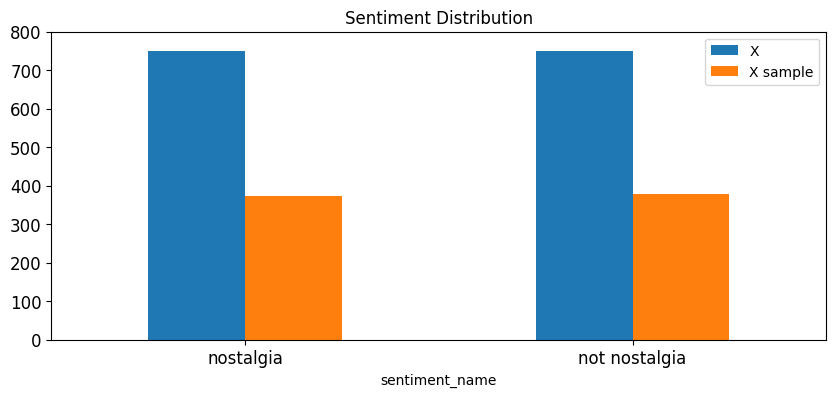

In [6]:
## plot sentiment distribution
X_sample = X.sample(n=750) #random state
upper_bound = X.sentiment_name.value_counts().max()

import matplotlib.pyplot as plt

# Example data
X_counts = X.sentiment_name.value_counts()

X_sample_counts = X_sample.sentiment_name.value_counts()

upper_bound = X_counts.max() + 50
# Combine series into a DataFrame
df = pd.DataFrame({
    'X': X_counts,
    'X sample': X_sample_counts
})

# Plotting
df.plot(kind='bar', title='Sentiment Distribution', ylim=[0, upper_bound], rot=0, fontsize=12, figsize=(10, 4))

In [7]:
## preprocessing
X['unigrams'] = X['comment'].apply(lambda x: dmh.tokenize_text(x))
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.comment) #learn the vocabulary and return document-term matrix
X_counts.shape

(1499, 3730)

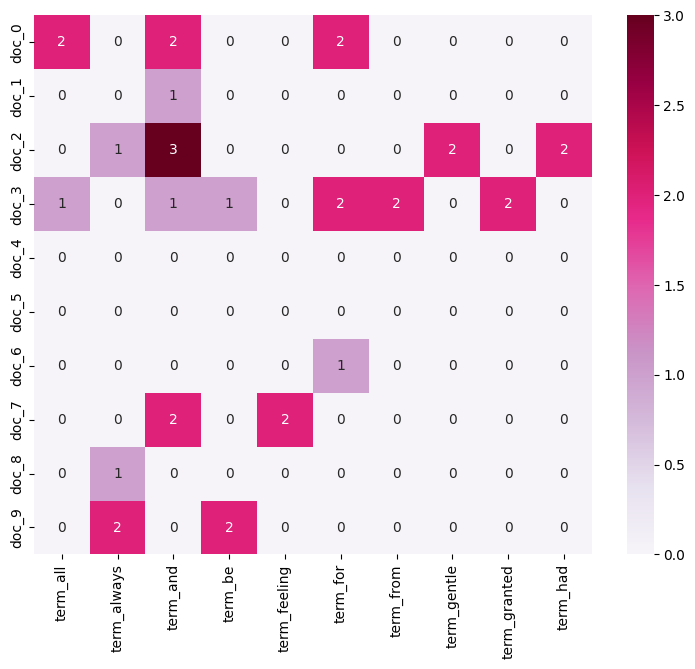

In [8]:
## plot heat map
import seaborn as sns
import numpy as np
select_index = np.unique(np.where(X_counts[0:10].toarray() >= 2)[1])[:10]
plot_x = ["term_"+str(count_vect.get_feature_names_out()[i]) for i in select_index]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:10]]
plot_z = X_counts[0:10, select_index].toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=3, annot=True)


/var/folders/w6/7xg86yyd14sddtw6qf9zbrsw0000gn/T/ipykernel_6093/1751955318.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


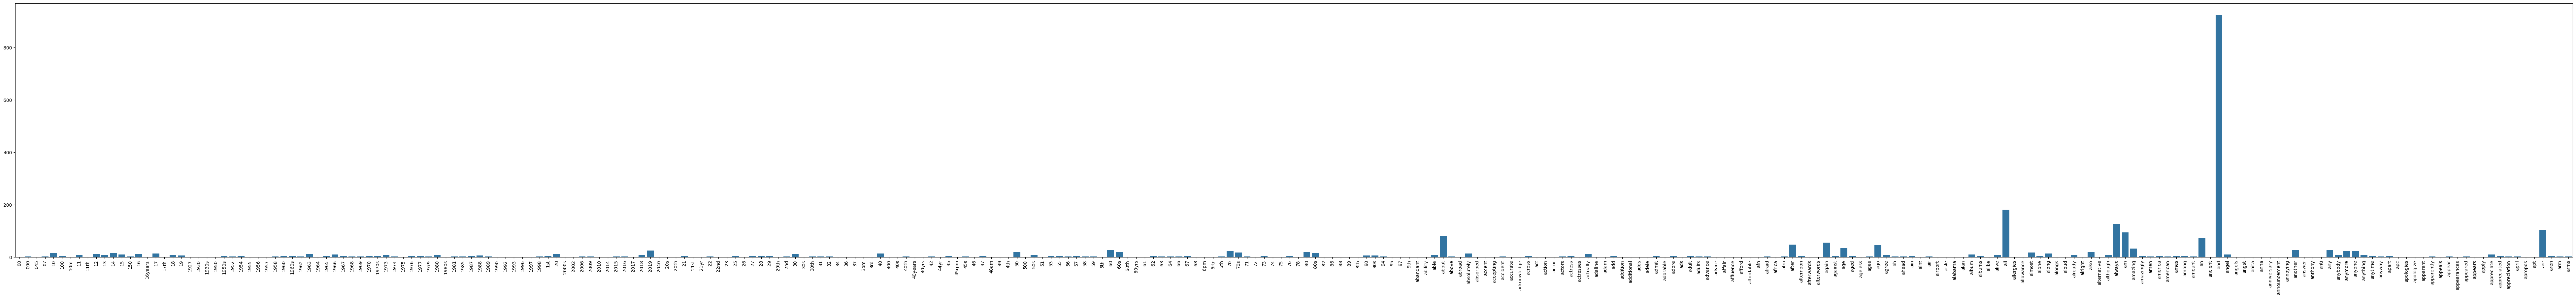

In [9]:
## aggregate and plot the result
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


[ 258  313  400 1473 1598 1630 1733 1804 2028 2254 2341 2915 3045 3278
 3282 3284 3300 3336 3563 3570 3607 3713]


/var/folders/w6/7xg86yyd14sddtw6qf9zbrsw0000gn/T/ipykernel_6093/2743891518.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[select_index], rotation = 90);


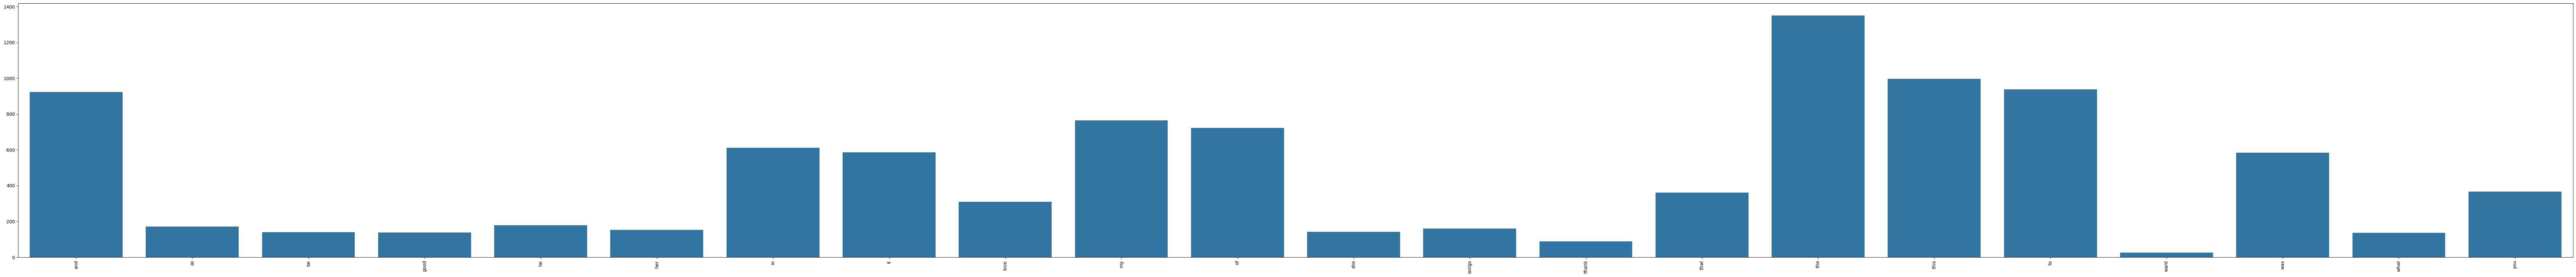

In [10]:
## more meaningful plot
select_index = np.unique(np.where(X_counts[0:].toarray() > np.max(X_counts[0:].toarray()) / 2)[1])
print(select_index)
new_term_frequencies = []
for j in select_index:
    new_term_frequencies.append(sum(X_counts[:,j].toarray())[0])

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[select_index], 
            y=new_term_frequencies)
g.set_xticklabels(count_vect.get_feature_names_out()[select_index], rotation = 90);

/var/folders/w6/7xg86yyd14sddtw6qf9zbrsw0000gn/T/ipykernel_6093/1056067611.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(np.array(sorted_terms[:300]), rotation = 90);


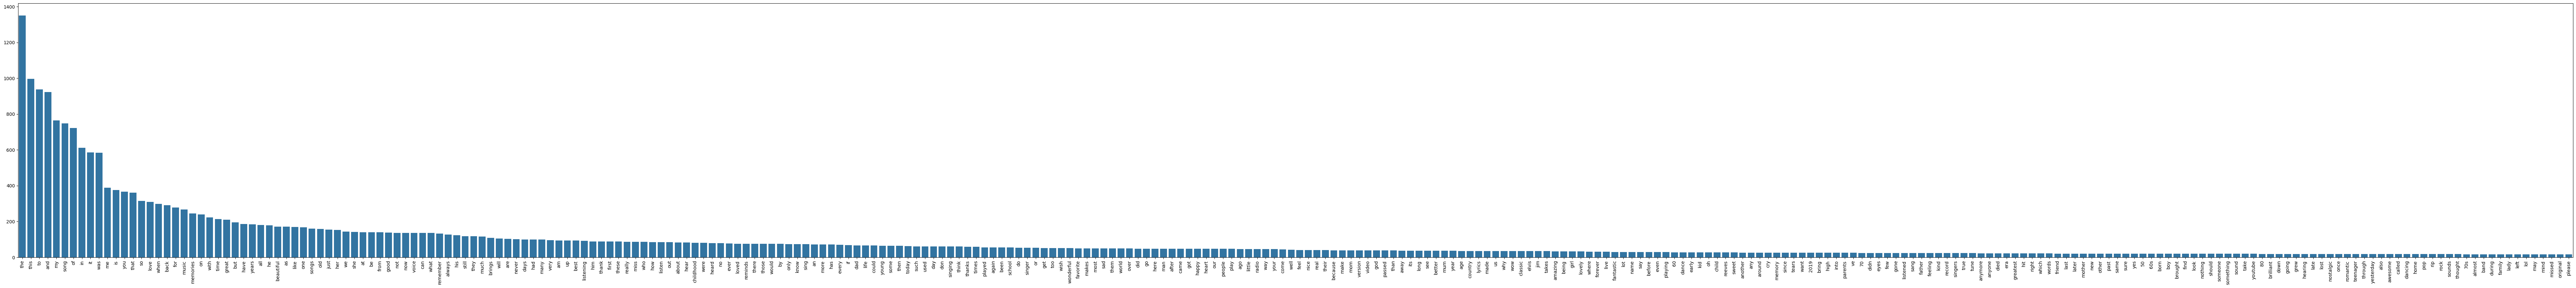

In [11]:
## check if there is any long tail scenario
sorted_data = sorted(zip(count_vect.get_feature_names_out(), term_frequencies), key=lambda x: x[1], reverse=True)
sorted_terms, sorted_term_frequencies = zip(*sorted_data)

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=np.array(sorted_terms[:300]), 
            y=np.array(sorted_term_frequencies[:300]))
g.set_xticklabels(np.array(sorted_terms[:300]), rotation = 90);

/var/folders/w6/7xg86yyd14sddtw6qf9zbrsw0000gn/T/ipykernel_6093/3293821195.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


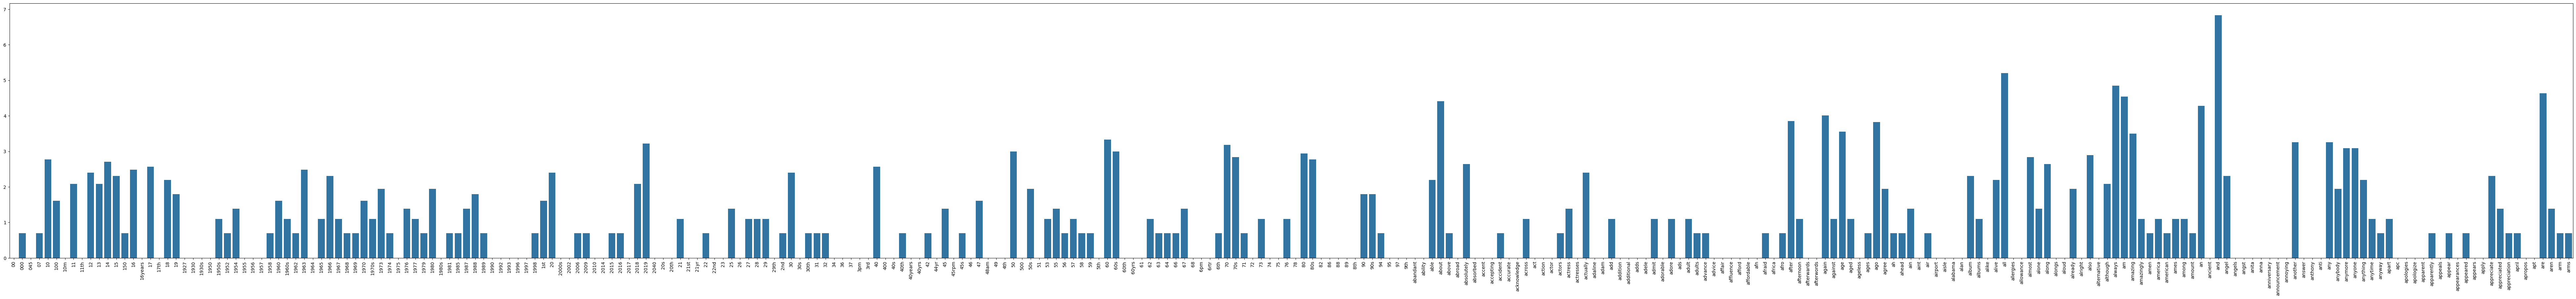

In [12]:
## plot log chart
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

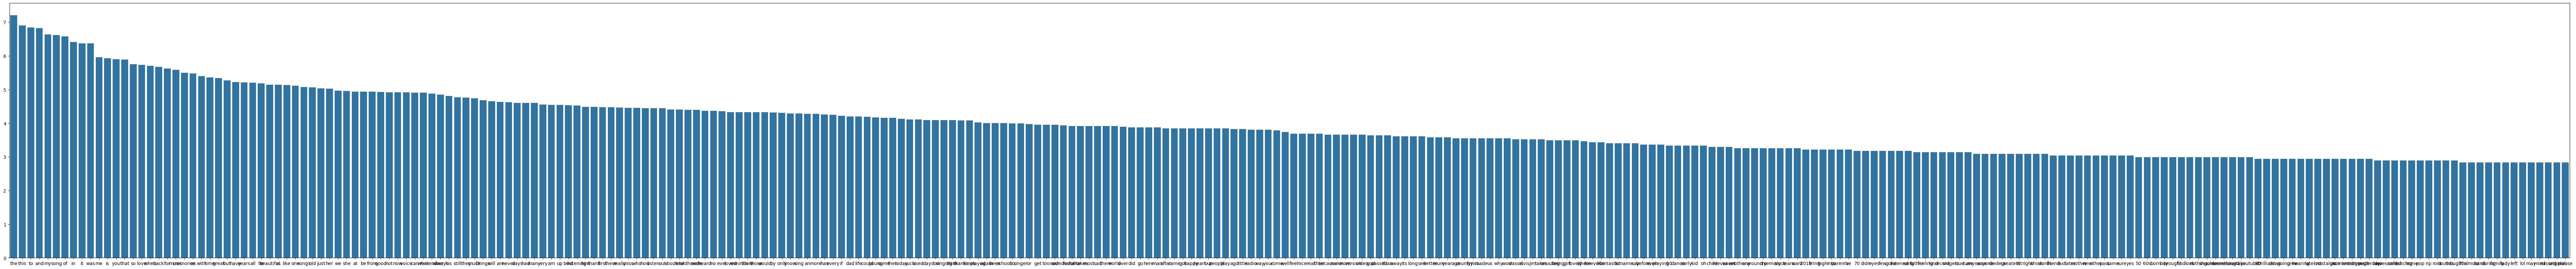

In [13]:
## plot log sort chart
sorted_term_frequencies_log = [math.log(i) for i in sorted_term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=np.array(sorted_terms[:300]), 
            y=np.array(sorted_term_frequencies_log[:300]))

In [14]:
## Using PMAI to do Datamining

### create transaction database
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = X['sentiment_name'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = X[X['sentiment_name'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['comment'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

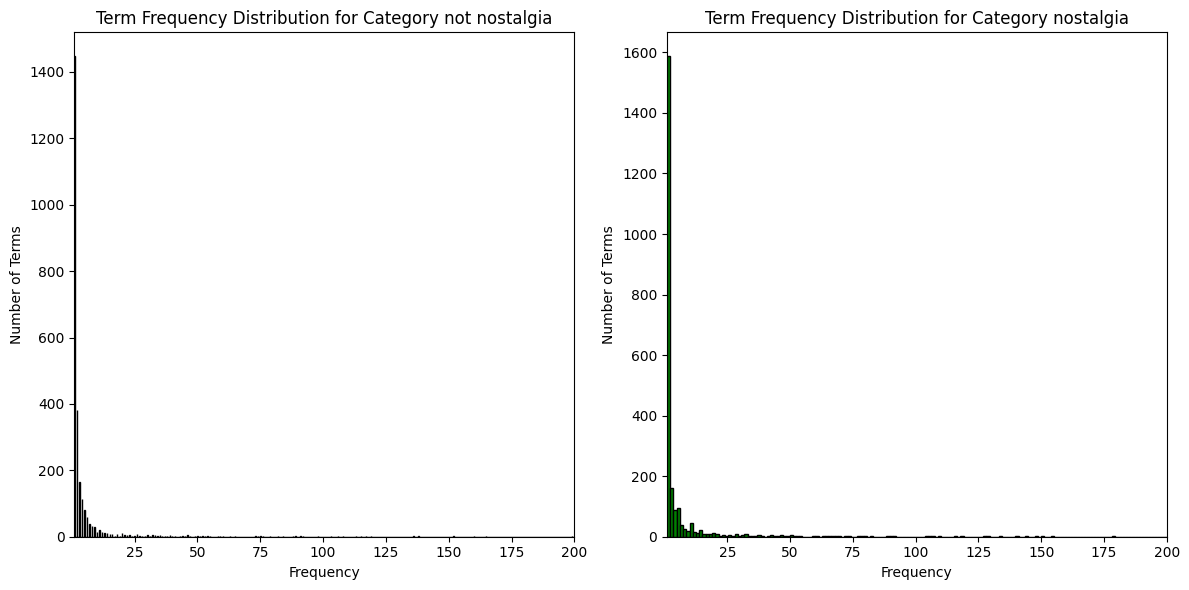

In [15]:
## plot the PAMI result
import matplotlib.pyplot as plt

category_number = 0
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Create a figure
plt.figure(figsize=(12, 6))

# First plot (left side)
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)

category_number = 1
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
# Second plot (right side)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.hist(word_counts, bins=500, color='green', edgecolor='black')  # Example of different bin size
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)

plt.tight_layout()  # Adjust spacing between plots
plt.show()

In [16]:
## show the top 0.05 words and bottom 0.01 words in both sentiments
category_numbers = [0, 1]

for category_number in category_numbers:
    word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
    
    # Sort the term frequencies in descending order
    sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
    sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order
    
    # Calculate the index corresponding to the top 5% most frequent terms
    total_terms = len(sorted_counts)
    top_5_percent_index = int(0.05 * total_terms)
    
    # Get the indices of the top 5% most frequent terms
    top_5_percent_indices = sorted_indices[:top_5_percent_index]
    
    # Filter terms that belong to the top 5% based on their rank
    filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]
    
    print(f"Category: {categories[category_number]}")
    print(f"Number of terms in top 5%: {top_5_percent_index}")
    print(f"Filtered terms: {filtered_words}")

print("------------------------------------------")
for category_number in category_numbers:
    word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
    
    # Sort the term frequencies in ascending order and get sorted indices
    sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
    sorted_counts = word_counts[sorted_indices]  # Sort frequencies
    
    # Calculate the index corresponding to the bottom 1% least frequent terms
    total_terms = len(sorted_counts)
    bottom_1_percent_index = int(0.01 * total_terms)
    
    # Get the indices of the bottom 1% least frequent terms
    bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]
    
    # Filter terms that belong to the bottom 1% based on their rank
    filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in bottom_1_percent_indices]
    
    print(f"Category: {categories[category_number]}")
    print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
    print(f"Filtered terms: {filtered_words}")

Category: not nostalgia
Number of terms in top 5%: 130
Filtered terms: ['the', 'this', 'and', 'to', 'of', 'song', 'it', 'is', 'in', 'you', 'that', 'my', 'love', 'music', 'was', 'for', 'so', 'have', 'one', 'like', 'but', 'he', 'with', 'great', 'all', 'on', 'what', 'not', 'be', 'can', 'me', 'voice', 'just', 'as', 'beautiful', 'songs', 'her', 'time', 'she', 'will', 'they', 'when', 'from', 'his', 'at', 'are', 'always', 'good', 'no', 'know', 'now', 'never', 'much', 'about', 'who', 'really', 'if', 'we', 'more', 'best', 'ever', 'by', 'thank', 'think', 'would', 'only', 'how', 'don', 'still', 'has', 'very', 'there', 'am', 'out', 'him', 'these', 'could', 'up', 'old', 'hear', 'do', 'listen', 'an', 'singer', 'had', 'many', 'here', 'such', 'version', 'too', 'today', 'been', 'most', 'get', 'your', 'people', 'world', 'heard', 'man', 'video', 'some', 'sing', 'listening', 'real', 'years', 'were', 'than', 'singing', 'heart', 'nice', 'their', 'better', 'life', 'day', 'its', 'then', 'way', 'sad', 'those',

In [17]:
## Filter the bottom 1% and top 5% words based on their sum across all documents

def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])



For category not nostalgia we filter the following words:
Bottom 1.0% words: 
00               1
montgomery       1
money            1
monday           1
moments          1
mocking          1
mock             1
mitch            1
misunderstood    1
minute           1
minds            1
miller           1
monumental       1
millennium       1
miles            1
microphone       1
miami            1
meta             1
mess             1
merle            1
mendes           1
mended           1
melting          1
melt             1
melodica         1
milestone        1
dtype: int64
Top 5.0% words: 
got         23
amazing     23
first       23
wish        24
any         25
          ... 
of         361
to         394
and        451
this       452
the        708
Length: 130, dtype: int64

For category nostalgia we filter the following words:
Bottom 1.0% words: 
yup            1
gospel         1
rose           1
round          1
rousing        1
goodness       1
routine        1
row         

In [18]:
## store the transaction database to csv file
# from PAMI.extras.DF2DB import DenseFormatDF as db
from PAMI.extras.convert.DF2DB import DF2DB
# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = DF2DB(term_document_dfs[category])
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)


result for not nostalgia
Database size (total no of transactions) : 745
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.410738255033557
Maximum Transaction Size : 46
Standard Deviation Transaction Size : 5.926429722323316
Variance in Transaction Sizes : 35.16977700801039
Sparsity : 0.9965614316210002
result for nostalgia
Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.693460490463215
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.213372063492091
Variance in Transaction Sizes : 52.103722524357735
Sparsity : 0.9959733855996001


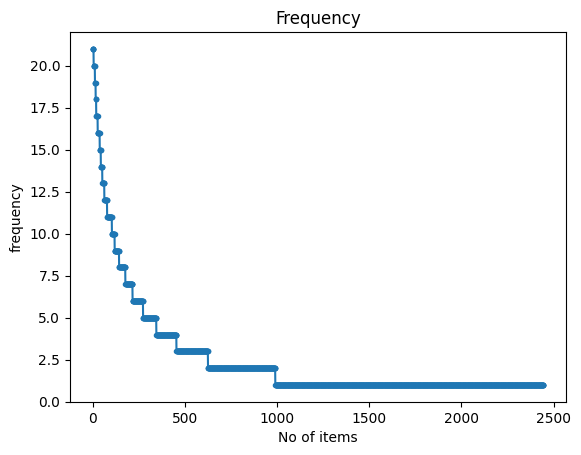

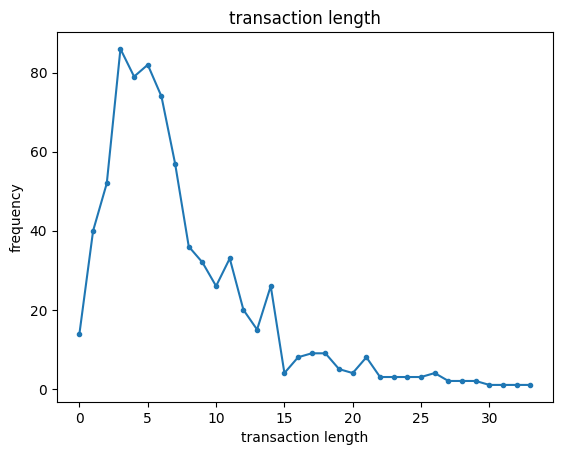

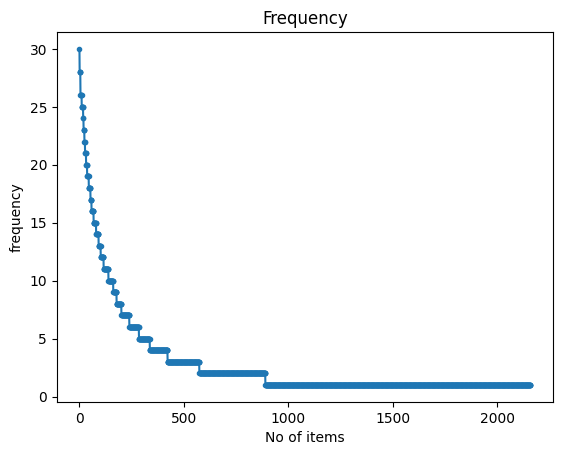

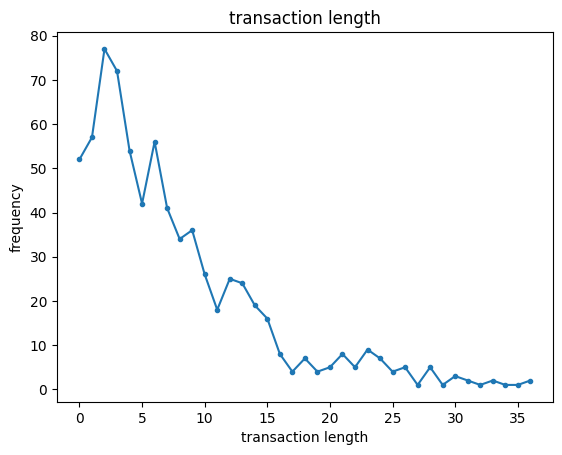

In [19]:
## plot the result of transaction database from csv file
from PAMI.extras.dbStats import TransactionalDatabase as tds
for category in term_document_dfs:
    print(f"result for {category}")
    obj = tds.TransactionalDatabase(f'td_freq_db_{category}.csv')
    obj.run()
    obj.printStats()
    obj.plotGraphs()

In [20]:
## Using FPGrowth algorithm to do data mining
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=3
obj1 = alg.FPGrowth(iFile=f'td_freq_db_not nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_not_nostalgia= obj1.getPatternsAsDataFrame()
obj1.save(f'freq_patterns_not nostalgia_minSup7.txt') #save the patterns
print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

obj2 = alg.FPGrowth(iFile=f'td_freq_db_nostalgia.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_nostalgia= obj2.getPatternsAsDataFrame()
obj2.save(f'freq_patterns_nostalgia_minSup7.txt') #save the patterns
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 730
Runtime: 0.33489990234375
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 948
Runtime: 0.018130064010620117


In [21]:
## find unique patterns
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_not_nostalgia, frequentPatternsDF_nostalgia]

# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

           Patterns  Support
1052           will       28
1051          would       28
1050           ever       28
1038           only       26
1047           wish       26
...             ...      ...
466              57        3
467        whatever        3
468          august        3
469          roller        3
1053  will favorite        3

[1054 rows x 2 columns]
Number of patterns discarded: 624


In [22]:
## append pattern matrix to the original data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
# count_vect = CountVectorizer()
# X_tdm = count_vect.fit_transform(X['comment']) 
terms = count_vect.get_feature_names_out()

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_counts.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

00  000  045  07  10  100  10m  11  11th  12  ...  store  watched  fun  \
0      0    0    0   0   0    0    0   0     0   0  ...      0        0    0   
1      0    0    0   0   0    0    0   0     0   0  ...      0        0    0   
2      0    0    0   0   0    0    0   0     0   0  ...      0        0    0   
3      0    0    0   0   0    0    0   0     0   0  ...      0        0    0   
4      0    0    0   0   0    0    0   0     0   0  ...      0        0    0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...      ...  ...   
1495   0    0    0   0   0    0    0   0     0   0  ...      0        0    0   
1496   0    0    0   0   0    0    0   0     0   0  ...      0        0    0   
1497   0    0    0   0   0    0    0   0     0   0  ...      0        0    0   
1498   0    0    0   0   0    0    0   0     0   0  ...      0        0    0   
1499   0    0    0   0   0    0    0   0     0   0  ...      0        0    0   

      1950s  bar  57  whatever  august  roller  will favorite  
0         0    0   0         0       0       0              0  
1         0    0   0         0       0       0              0  
2         0    0   0         0       0       0              0  
3         0    0   0         0       0       0              0  
4         0    0   0         0       0       0              0  
...     ...  ...  ..       ...     ...     ...            ...  
1495      0    0   0         0       0       0              0  
1496      0    0   0         0       0       0              0  
1497      0    0   0         0       0       0              0  
1498      0    0   0         0       0       0              0  
1499      0    0   0         0       0       0              0  

[1499 rows x 4784 columns]

In [23]:
## try to use Top-k FAE algorithm and MaxFPGrowth as Exercise 17
### FAE Top-K
from PAMI.frequentPattern.topk import FAE  as FAE_alg
kCounts=[45,70,100]
topk_FAE = []
topk_FAE_run_time = []
for k in kCounts:
    obj = FAE_alg.FAE(iFile='td_freq_db_not nostalgia.csv', k=k)
    obj.mine()
    frequentPatternsDF_comp_graphics_FAE= obj.getPatternsAsDataFrame()
    # print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics_FAE))) #print the total number of patterns
    # print('Runtime: ' + str(obj.getRuntime())) #measure the runtime
    topk_FAE.append(frequentPatternsDF_comp_graphics_FAE)
    topk_FAE_run_time.append(str(obj.getRuntime()))

### MaxFPGrowth
from PAMI.frequentPattern.maximal import MaxFPGrowth  as MaxFPGrowth_alg
minSups = [3, 6, 9]
MaxFPGrowth_result = []
MaxFPGrowth_run_time = []
for minSupport in minSups:
    obj = MaxFPGrowth_alg.MaxFPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSupport)
    obj.mine()
    frequentPatternsDF_comp_graphics_MaxFPGrowth= obj.getPatternsAsDataFrame()
    # print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics_MaxFPGrowth))) #print the total number of patterns
    # print('Runtime: ' + str(obj.getRuntime())) #measure the runtime
    MaxFPGrowth_result.append(frequentPatternsDF_comp_graphics_MaxFPGrowth)
    MaxFPGrowth_run_time.append(str(obj.getRuntime()))

for result in topk_FAE:
    print(result)
    
for result in topk_FAE_run_time:
    print(result)
    
for result in MaxFPGrowth_result:
    print(result)

for result in MaxFPGrowth_run_time:
    print(result)

 TopK frequent patterns were successfully generated using FAE algorithm.
 TopK frequent patterns were successfully generated using FAE algorithm.
 TopK frequent patterns were successfully generated using FAE algorithm.
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
     Patterns  Support
0       elvis       21
1       every       21
2       loved       21
3     classic       21
4        them       21
5      lyrics       21
6        days       20
7        well       20
8   wonderful       20
9        made       20
10   favorite       20
11     thanks       20
12         ve       20
13        age       19
14      young       19
15         go       19
16        see       19
17       back       18
18   greatest       18
19      makes       18
20       feel       17
21       true       17


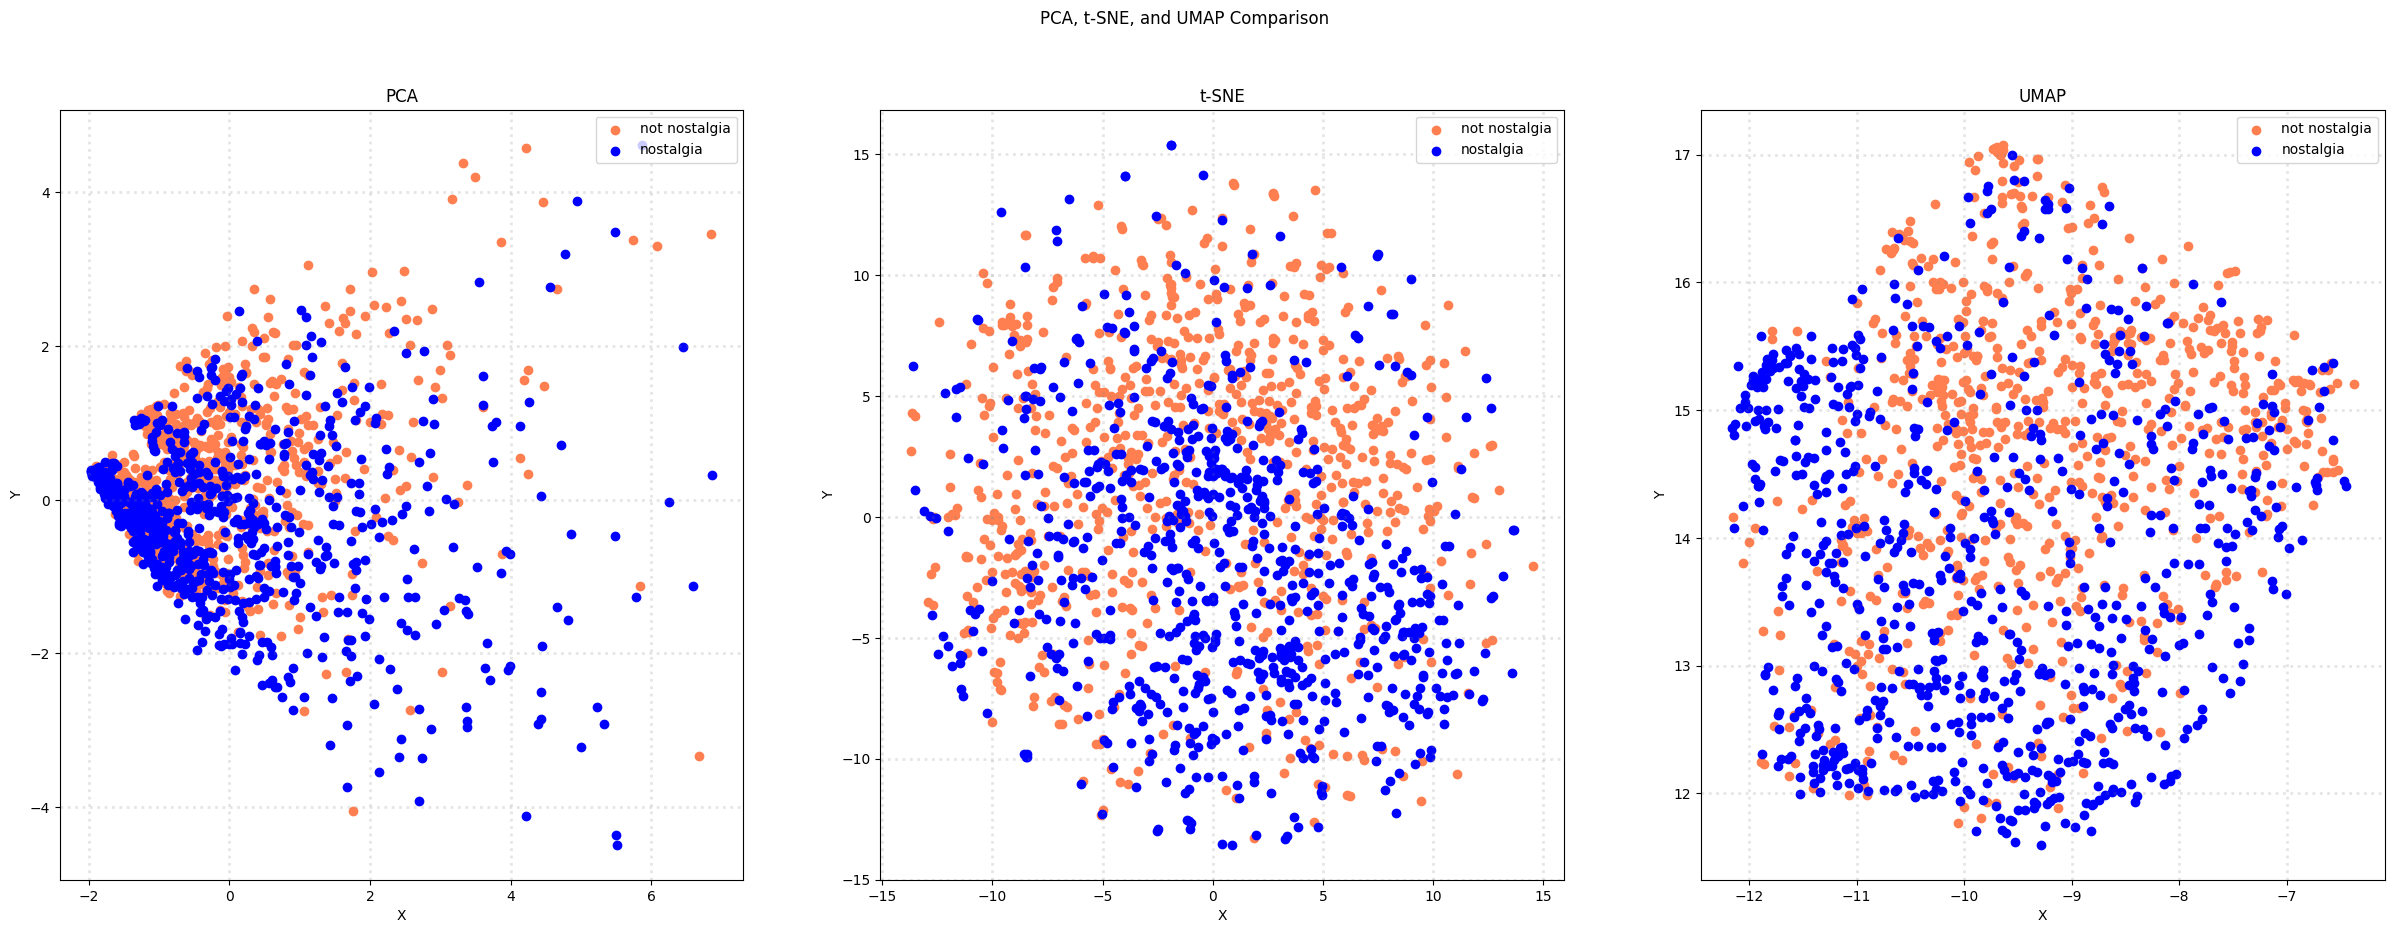

In [24]:
## Show the original result of dimensionality reduction with 2D
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

# Plot the results in subplots
col = ['coral', 'blue']
categories = X['sentiment_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment_name'] == category].T[0]
        ys = X_reduced[X['sentiment_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

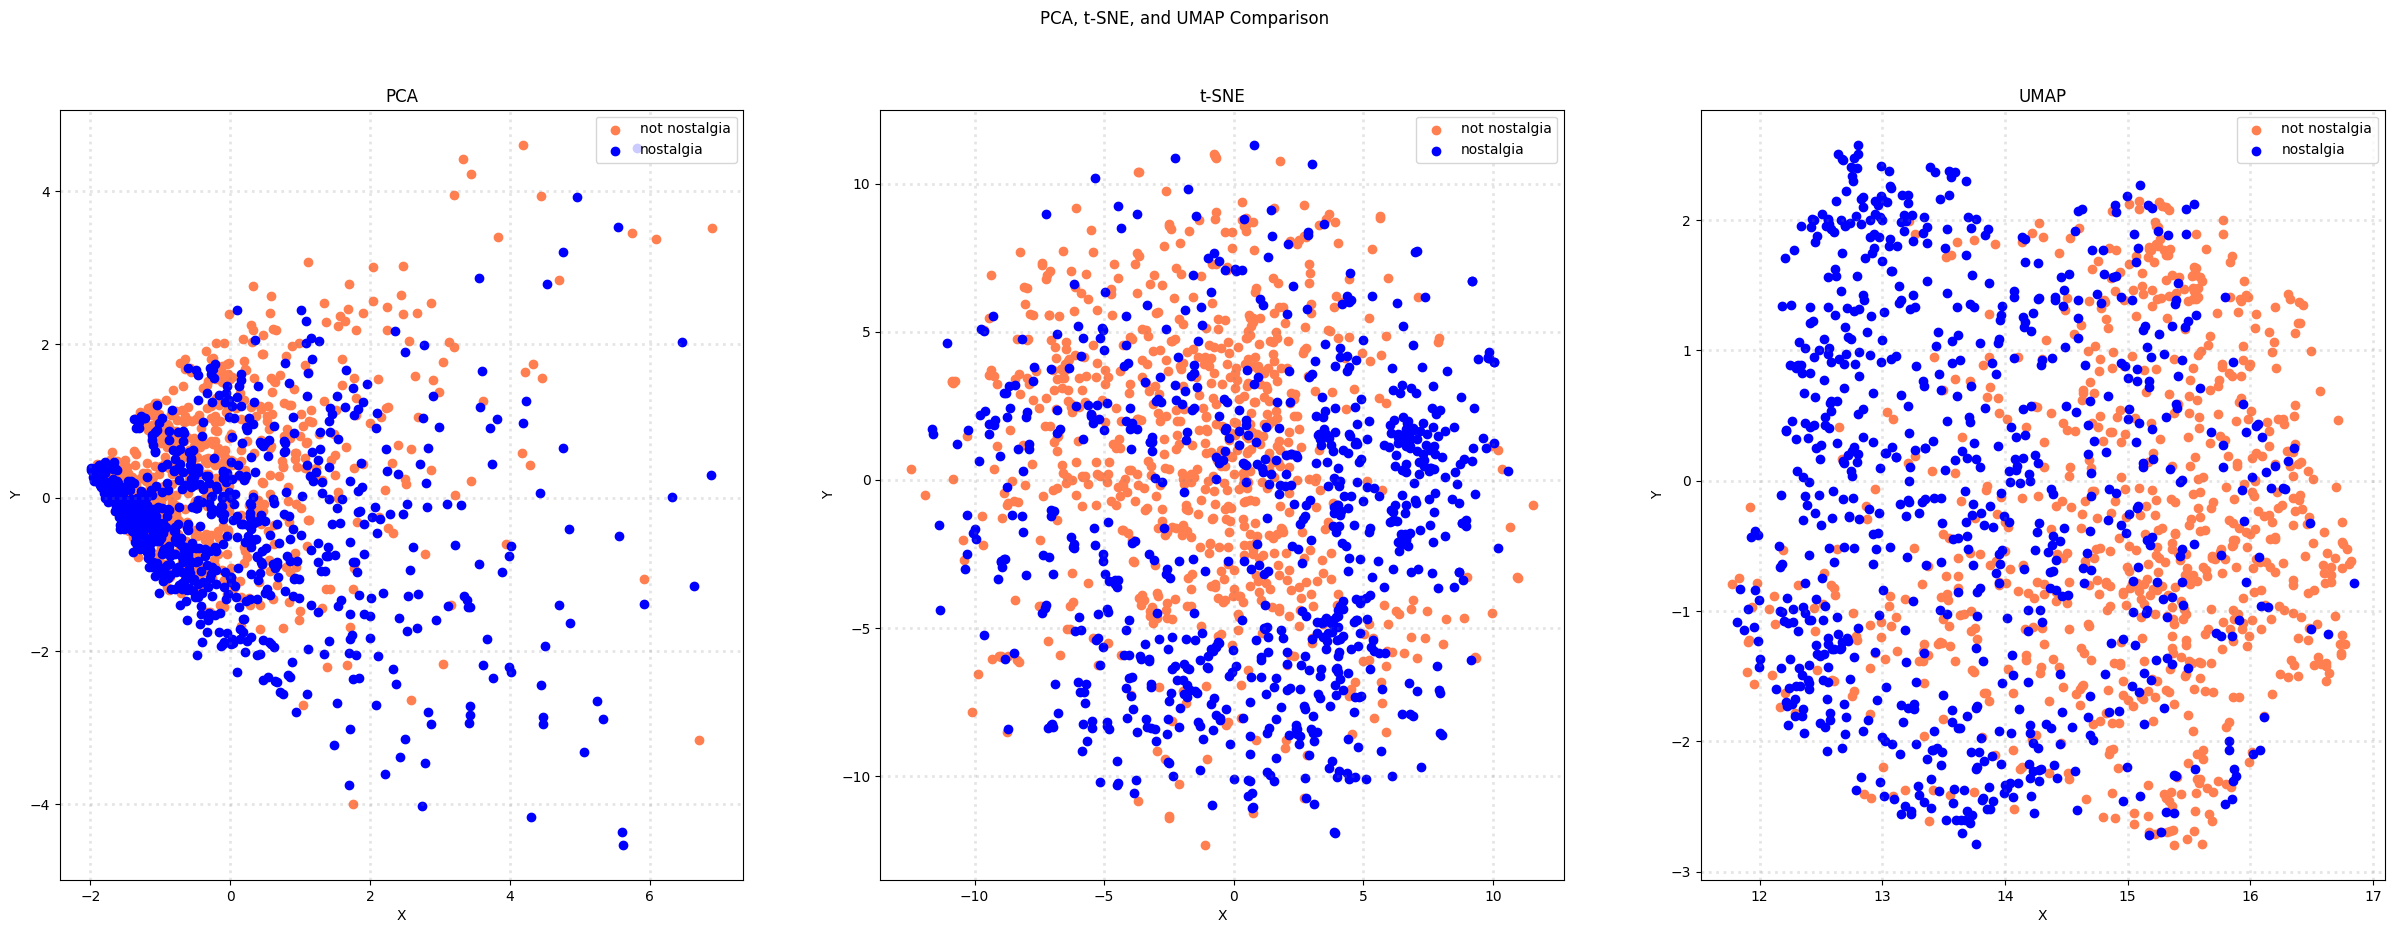

In [25]:
## Show the augment result of dimensionality reduction with 2D
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)
col = ['coral', 'blue']
categories = X['sentiment_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment_name'] == category].T[0]
        ys = X_reduced[X['sentiment_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

In [26]:
X_pca_aug = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

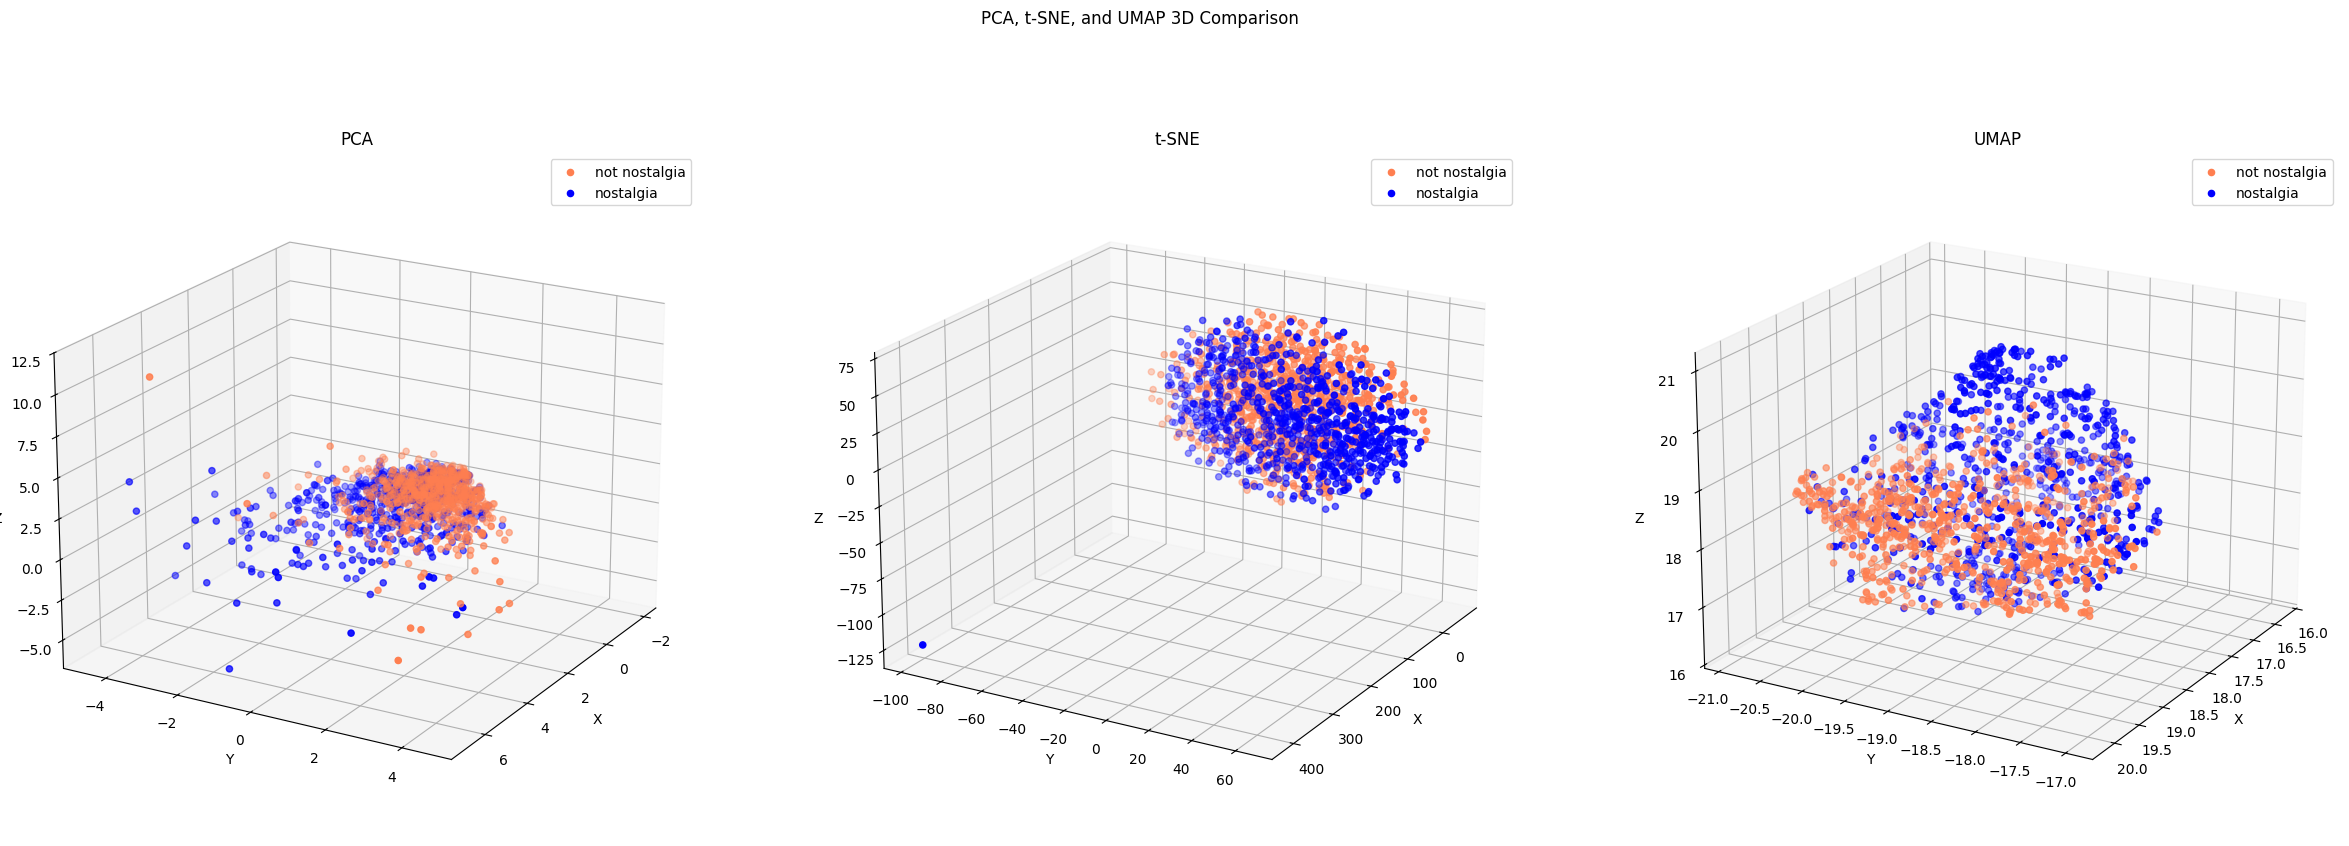

In [27]:
## Show the augment result of dimensionality reduction with 3D
from mpl_toolkits.mplot3d import Axes3D  # Import Axes3D for 3D plots
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

col = ['coral', 'blue']
categories = X['sentiment_name'].unique() 

fig = plt.figure(figsize=(30, 10))  # Create a figure for 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP 3D Comparison')

# Create 3D subplots for PCA, t-SNE, and UMAP
ax1 = fig.add_subplot(131, projection='3d')  # PCA
ax2 = fig.add_subplot(132, projection='3d')  # t-SNE
ax3 = fig.add_subplot(133, projection='3d')  # UMAP

# Define a function to create a scatter plot for each method in 3D
def plot_scatter_3d(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment_name'] == category].T[0]
        ys = X_reduced[X['sentiment_name'] == category].T[1]
        zs = X_reduced[X['sentiment_name'] == category].T[2]  # Third dimension (Z)
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')

# Create 3D scatter plots for PCA, t-SNE, and UMAP
plot_scatter_3d(ax1, X_pca_aug, 'PCA')
plot_scatter_3d(ax2, X_tsne_aug, 't-SNE')
plot_scatter_3d(ax3, X_umap_aug, 'UMAP')

# # First view: elevation = 20, azimuth = 30
ax1.view_init(elev=20, azim=30)
ax2.view_init(elev=20, azim=30)
ax3.view_init(elev=20, azim=30)
plt.show()

# # Second view: elevation = 30, azimuth = 60
# ax1.view_init(elev=30, azim=60)
# ax2.view_init(elev=30, azim=60)
# ax3.view_init(elev=30, azim=60)
# plt.show()

# Third view: elevation = 40, azimuth = 90
# ax1.view_init(elev=40, azim=90)
# ax2.view_init(elev=40, azim=90)
# ax3.view_init(elev=40, azim=90)
# plt.show()

In [28]:
## Binarization and Discretization
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.sentiment)
X['bin_sentiment'] = mlb.transform(X['sentiment']).tolist()
X[0:9]

comment sentiment_name  \
0  He was a singer with a golden voice that I lov...  not nostalgia   
1  The mist beautiful voice ever I listened to hi...      nostalgia   
2  I have most of Mr. Reeves songs.  Always love ...      nostalgia   
3  30 day leave from 1st tour in Viet Nam to conv...  not nostalgia   
4  listening to his songs reminds me of my mum wh...      nostalgia   
5  Every time I heard this song as a child, I use...      nostalgia   
6  My dad loved listening to Jim Reeves, when I w...      nostalgia   
7  i HAVE ALSO LISTENED TO Jim Reeves since child...      nostalgia   
8           Wherever you  are you always in my heart  not nostalgia   

   sentiment                                           unigrams  \
0          0  [He, was, a, singer, with, a, golden, voice, t...   
1          1  [The, mist, beautiful, voice, ever, I, listene...   
2          1  [I, have, most, of, Mr., Reeves, songs, ., Alw...   
3          0  [30, day, leave, from, 1st, tour, in, Viet, Na...   
4          1  [listening, to, his, songs, reminds, me, of, m...   
5          1  [Every, time, I, heard, this, song, as, a, chi...   
6          1  [My, dad, loved, listening, to, Jim, Reeves, ,...   
7          1  [i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...   
8          0   [Wherever, you, are, you, always, in, my, heart]   

                                      tokenized_text bin_sentiment  
0  {a, with, all, great, 16years, now., those, Re...           [0]  
1  {a, The, listened, ever, him, kid, I, voice, h...           [1]  
2  {a, with, --, who, little, graduated, great, i...           [1]  
3  {a, all, who, me", hope, 2nd, I, 30, day, my, ...           [0]  
4  {me, his, listening, who, everyday, to, mum, p...           [1]  
5  {a, got, it, souls., over, I, voice, me, RIP, ...           [1]  
6  {a, didn't, it, do, things., I, dad, me, My, R...           [1]  
7  {a, ALSO, with, music., Reeves, I, comes, me, ...           [1]  
8        {in, heart, are, Wherever, always, you, my}           [0]

In [29]:
## Data Exploration
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import binarize
document_to_transform_1 = []
random_record_1 = X.iloc[50]

random_record_1 = random_record_1['comment']

document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]

random_record_2 = random_record_2['comment']

document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]

random_record_3 = random_record_3['comment']

document_to_transform_3.append(random_record_3)

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.032174
Cosine Similarity using count bw 1 and 3: 0.027864
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


/var/folders/w6/7xg86yyd14sddtw6qf9zbrsw0000gn/T/ipykernel_6093/3399423961.py:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
/var/folders/w6/7xg86yyd14sddtw6qf9zbrsw0000gn/T/ipykernel_6093/3399423961.py:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
/var/folders/w6/7xg86yyd14sddtw6qf9zbrsw0000gn/T/ipykernel_6093/3399423961.py:47: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single elemen

In [30]:
## Data classification for the original data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['sentiment', 'sentiment_name']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['sentiment'], test_size=0.3, random_state=42)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8688888888888889

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.9389    0.7788    0.8514       217
    nostalgia     0.8222    0.9528    0.8827       233

     accuracy                         0.8689       450
    macro avg     0.8806    0.8658    0.8670       450
 weighted avg     0.8785    0.8689    0.8676       450



In [31]:
## Data classification for the augmentation data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['sentiment', 'sentiment_name']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, X['sentiment'], test_size=0.3, random_state=42)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.88

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.9358    0.8065    0.8663       217
    nostalgia     0.8403    0.9485    0.8911       233

     accuracy                         0.8800       450
    macro avg     0.8881    0.8775    0.8787       450
 weighted avg     0.8864    0.8800    0.8792       450



## Third

In [32]:
!pip install WordCloud

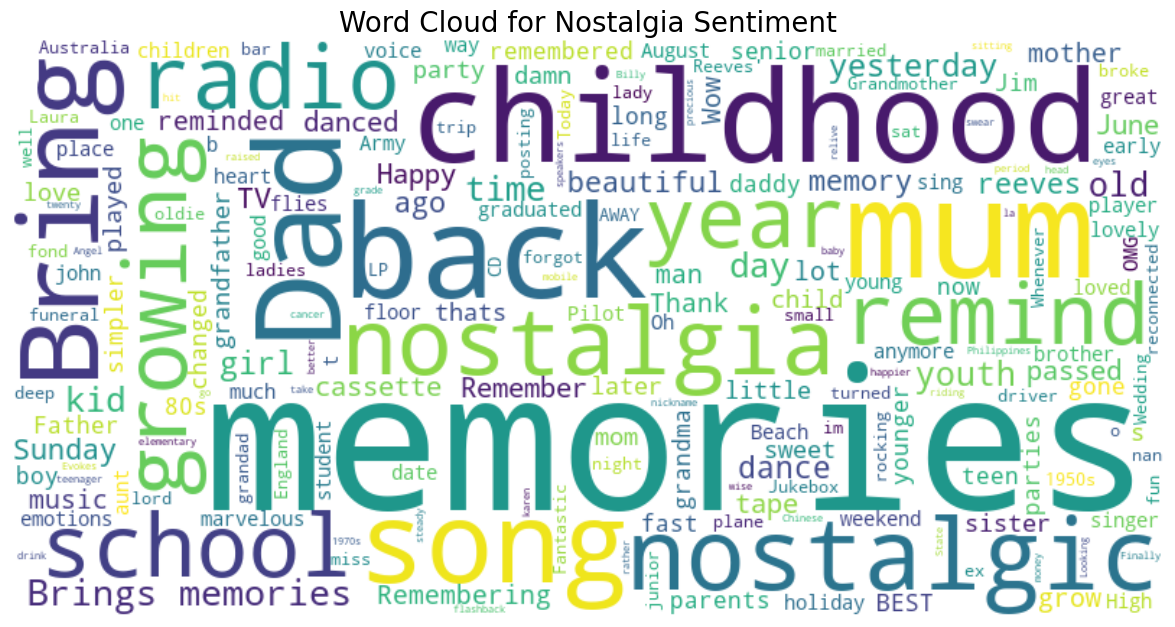

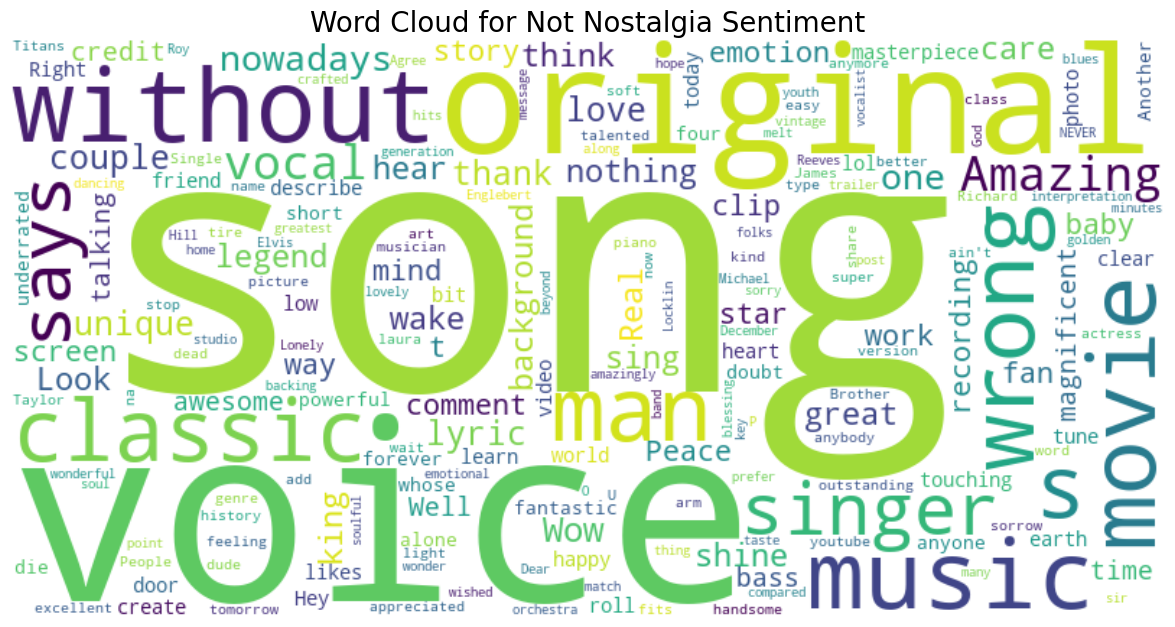

In [33]:
## drawing  meaningful plot

'''
I used the WordCloud package to plot the frequency of words for both 'nostalgia' and 'non-nostalgia' categories. In the resulting word clouds,
more frequent words appear larger. This method allows us to visualize more meaningful results. For instance, in the 'nostalgia' category, words
like 'memories' and 'childhood' stand out prominently.
'''
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(15, 7.5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

# Word Cloud for 'nostalgia'
nostalgia_text = ' '.join(X[X['sentiment_name'] == 'nostalgia']['comment'])
nostalgia_text_list = nostalgia_text.split(' ')
# generate_wordcloud(nostalgia_text, 'Word Cloud for Nostalgia Sentiment')

# Word Cloud for 'not nostalgia='
not_nostalgia_text = ' '.join(X[X['sentiment_name'] == 'not nostalgia']['comment'])
not_nostalgia_text_list = not_nostalgia_text.split(' ')

unique_nostalgia_text_list = [  word for word in nostalgia_text_list if word not in not_nostalgia_text_list]
unique_not_nostalgia_text_list = [  word for word in not_nostalgia_text_list if word not in nostalgia_text_list]

generate_wordcloud(' '.join(unique_nostalgia_text_list), 'Word Cloud for Nostalgia Sentiment')
generate_wordcloud(' '.join(unique_not_nostalgia_text_list), 'Word Cloud for Not Nostalgia Sentiment')

In [34]:
!pip install TextBlob

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize comments
count_vectorizer = CountVectorizer(stop_words='english')
count_data = count_vectorizer.fit_transform(X['comment'])

# Fit LDA
lda = LatentDirichletAllocation(n_components=2, random_state=0)
lda.fit(count_data)

# Function to display topics
def display_topics(model, feature_names, no_top_words):
    Topic = ['not Nostalgic', 'Nostalgic']
    for idx, topic in enumerate(model.components_):
        category = Topic[idx]
        print(f"{category}")
        print([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])

# Display topics
display_topics(lda, count_vectorizer.get_feature_names_out(), 10)


not Nostalgic
['love', 'music', 'voice', 'great', 'know', 'like', 'people', 'songs', 'thank', 'singer']
Nostalgic
['song', 'memories', 'love', 'time', 'years', 'music', 'old', 'great', 'beautiful', 'remember']


In [36]:
## generate TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer
### read data
raw_data = pd.read_csv('Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv')

X = pd.DataFrame.from_records(format_rows(raw_data), columns= ['comment'])
X['sentiment_name'] = raw_data.sentiment
X['sentiment'] = raw_data.sentiment.apply(lambda t: format_labels(t))
X.drop_duplicates(inplace=True)
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X['comment'])
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df

00  000  045   07   10  100  10m   11  11th   12  ...  yours  yourself  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...    ...       ...   
1494  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1495  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1496  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1497  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1498  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
0       0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
1       0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
2       0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
3       0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
4       0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
...     ...       ...      ...  ...  ...  ...      ...    ...  
1494    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
1495    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
1496    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
1497    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
1498    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  

[1499 rows x 3730 columns]

In [37]:
## code for training Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.comment) #learn the vocabulary and return document-term matrix
# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_counts, X['sentiment'], test_size=0.3, random_state=42)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Word frequency")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))


X_train, X_test, y_train, y_test = train_test_split(tfidf_df, X['sentiment'], test_size=0.3, random_state=42)

nb_classifier = BernoulliNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)
print("TF-IDF features")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Word frequency
Accuracy: 0.8688888888888889

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.9389    0.7788    0.8514       217
    nostalgia     0.8222    0.9528    0.8827       233

     accuracy                         0.8689       450
    macro avg     0.8806    0.8658    0.8670       450
 weighted avg     0.8785    0.8689    0.8676       450

TF-IDF features
Accuracy: 0.8844444444444445

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.9275    0.8249    0.8732       217
    nostalgia     0.8521    0.9399    0.8939       233

     accuracy                         0.8844       450
    macro avg     0.8898    0.8824    0.8835       450
 weighted avg     0.8885    0.8844    0.8839       450



In [38]:
## comment on the difference
'''
We use Multinomial Naive Bayes (MNB) for word frequency features and use Bernoulli Naive Bayes (BNB) for TF-IDF features.
While the Multinomial model is well-suited for frequency counts of words, the Bernoulli model works well with binary data, such as the
presence or absence of a word, which aligns with the properties of TF-IDF. After training, I discover that the setting with TF-IDF features
and Bernoulli Naive Bayes performs better.
'''

'\nWe use Multinomial Naive Bayes (MNB) for word frequency features and use Bernoulli Naive Bayes (BNB) for TF-IDF features.\nWhile the Multinomial model is well-suited for frequency counts of words, the Bernoulli model works well with binary data, such as the\npresence or absence of a word, which aligns with the properties of TF-IDF. After training, I discover that the setting with TF-IDF features\nand Bernoulli Naive Bayes performs better.\n'